<a href="https://colab.research.google.com/github/AENatsuKage/KG_with_Neo4j_aura_online_appli_instance_20250610/blob/main/KG_with_Neo4j_aura_online_appli_instance_20250726.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 0. Initialization: Repository Reliance `py2neo`

- Toolkit: [neo4j aura](https://console-preview.neo4j.io/)
- Prompt: py2neo installation, and configuration that connect the notebook to neo4j aura.

#### 0.1. Installing `py2neo`

In [ ]:
# prompt: py2neo installation, and configuration that connect the notebook to neo4j aura.

!pip install py2neo

#### 0.2. Chinese Font Installation for `matplotlib`
- 解决`matplotlib`中文显示问题

--2025-07-26 07:21:51--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.251.167.100, 142.251.167.139, 142.251.167.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.167.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-07-26 07:21:51--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.31.132, 2607:f8b0:4004:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.31.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  71.5MB/s    in 0.3s    

2025-07-26 07

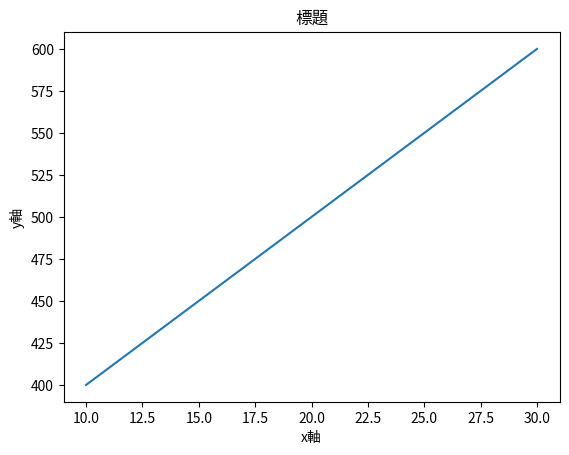

In [ ]:
'''
# prompt:
When I'm running jupyter notebooks in Google colab,
how can I configure matplotlib font so that Chinese
characters can be displayed normally?
'''

# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.plot((10,20,30),(400,500,600))
plt.title("標題")
plt.ylabel("y軸")
plt.xlabel("x軸")
plt.show()

#### 0.3. `py2neo` Configuration: Connect the notebook to `neo4j aura`
- [neo4j aura](https://console-preview.neo4j.io/)

In [ ]:
from py2neo import Graph, Node, Relationship
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

passkey = pd.read_csv('/content/drive/My Drive/Colab Notebooks/_KG_data_reliance_20250610/py2neo_passkey_20250722.csv')

# Replace with your Neo4j Aura connection details
uri = passkey['URI'][0]
user = passkey['USER'][0]
password = passkey['PASSWORD'][0]

graph = Graph(uri, auth=(user, password))

# Optional: Test the connection
try:
    graph.run("MATCH (n) RETURN count(n)")
    print("Successfully connected to Neo4j Aura.")
except Exception as e:
    print(f"Failed to connect to Neo4j Aura: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Successfully connected to Neo4j Aura.


In [8]:
# 清空数据库以防重复
graph.delete_all()

# 0+. Graph Operation without data

## 0+.1. 传感器 - 汽轮机设备
- Prompt: Please help me create a node class "传感器", including nodes ["温度传感器", "压力传感器", "振动传感器", "转速传感器"]; then create another node class "汽轮机设备", including ["高压缸", "中压缸", "低压缸", "轴承", "叶片", "调节阀"]. After that, please help me create edges (i.e., relationships) connecting the two classes of nodes. The attribute of edges (relationships) are randomly-assigned importance weights, values between 0 and 1.

In [9]:
import random

# Define the node classes and their members
node_classes = {
    "传感器": ["温度传感器", "压力传感器", "振动传感器", "转速传感器"],
    "汽轮机设备": ["高压缸", "中压缸", "低压缸", "轴承", "叶片", "调节阀"]
}

# Create nodes
for label, names in node_classes.items():
    for name in names:
        node = Node(label, name=name)
        graph.create(node)

# Create relationships with random weights
for sensor_name in node_classes["传感器"]:
    for equipment_name in node_classes["汽轮机设备"]:
        sensor_node = graph.nodes.match("传感器", name=sensor_name).first()
        equipment_node = graph.nodes.match("汽轮机设备", name=equipment_name).first()

        # Assign a random weight between 0 and 1
        weight = random.random()

        # Create a relationship
        relationship = Relationship(sensor_node, "monitors", equipment_node, weight=weight)
        graph.create(relationship)

print("Nodes and relationships created successfully.")

Nodes and relationships created successfully.


- Prompt: Please help me obtain the weight matrix between "传感器" and "汽轮机设备", then visualize the weight matrix using seaborn-heatmap, and save the heatmap figure to my drive in svg format. Speicfic requirements following: (1) figsize=(6,4), (2) tight_layout=True, (3) cmap='Blues'.

Weight Matrix extracted:
[[0.6797487  0.23040247 0.5870725  0.06139554 0.28253931 0.97888578]
 [0.89658428 0.86894498 0.04154084 0.77853686 0.60082511 0.2797465 ]
 [0.18351435 0.89023446 0.84121262 0.82919452 0.15755733 0.21075687]
 [0.58914969 0.69347886 0.51132081 0.74553802 0.45673913 0.73444737]]


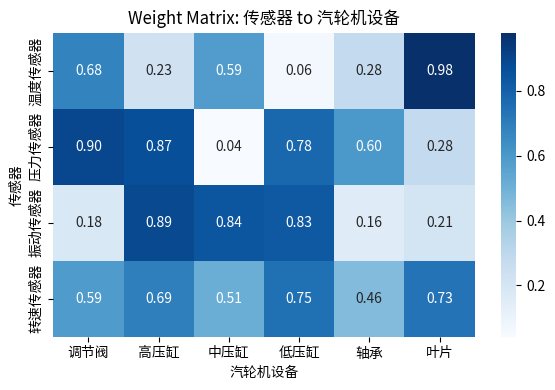

Heatmap saved to your Google Drive as sensor_equipment_heatmap.svg


In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract nodes for "传感器" and "汽轮机设备"
query_nodes_sensor = "MATCH (n:传感器) RETURN n.name AS name"
nodes_sensor_result = graph.run(query_nodes_sensor).data()
nodes_sensor = [item['name'] for item in nodes_sensor_result]

query_nodes_equipment = "MATCH (n:汽轮机设备) RETURN n.name AS name"
nodes_equipment_result = graph.run(query_nodes_equipment).data()
nodes_equipment = [item['name'] for item in nodes_equipment_result]

# Create a mapping from node name to index
sensor_to_index = {name: i for i, name in enumerate(nodes_sensor)}
equipment_to_index = {name: i for i, name in enumerate(nodes_equipment)}

# Initialize the weight matrix with zeros
weight_matrix = np.zeros((len(nodes_sensor), len(nodes_equipment)))

# Extract relationships and their weights
query_relationships = """
MATCH (a:传感器)-[r:monitors]->(b:汽轮机设备)
RETURN a.name AS source, b.name AS target, r.weight AS weight
"""
relationships_result = graph.run(query_relationships).data()

# Populate the weight matrix
for rel in relationships_result:
    source_name = rel['source']
    target_name = rel['target']
    weight = rel['weight']
    if source_name in sensor_to_index and target_name in equipment_to_index:
        i = sensor_to_index[source_name]
        j = equipment_to_index[target_name]
        weight_matrix[i, j] = weight

print("Weight Matrix extracted:")
print(weight_matrix)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weight_matrix, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=nodes_equipment, yticklabels=nodes_sensor)
plt.xlabel("汽轮机设备")
plt.ylabel("传感器")
plt.title("Weight Matrix: 传感器 to 汽轮机设备")

# Save the figure to Google Drive
plt.savefig('/content/drive/My Drive/sensor_equipment_heatmap.svg', format='svg')

plt.tight_layout()
plt.show()

print("Heatmap saved to your Google Drive as sensor_equipment_heatmap.svg")

## 0+.2. 汽轮机设备 - 运行状态
- Prompt: Please help me create a node class "设备运行状态", including nodes ["正常", "预警", "报警", "故障"]; then connect these nodes to the nodes in previous class "汽轮机设备", including ["高压缸", "中压缸", "低压缸", "轴承", "叶片", "调节阀"] with edges (relationship). The attribute of edges (relationships) are randomly-assigned importance weights, values between 0 and 1.

In [10]:
import random

# Define the new node class and its members
new_node_class = {
    "设备运行状态": ["正常", "预警", "报警", "故障"]
}

# Create the new nodes
for label, names in new_node_class.items():
    for name in names:
        node = Node(label, name=name)
        graph.create(node)

# Create relationships with random weights
for status_name in new_node_class["设备运行状态"]:
    for equipment_name in node_classes["汽轮机设备"]:
        status_node = graph.nodes.match("设备运行状态", name=status_name).first()
        equipment_node = graph.nodes.match("汽轮机设备", name=equipment_name).first()

        # Assign a random weight between 0 and 1
        weight = random.random()

        # Create a relationship
        relationship = Relationship(equipment_node, "has_status", status_node, weight=weight)
        graph.create(relationship)

print("New nodes and relationships created successfully.")

New nodes and relationships created successfully.


- Prompt: Please help me obtain the weight matrix between "设备运行状态" and "汽轮机设备", then visualize the weight matrix using seaborn-heatmap, and save the heatmap figure to my drive in svg format. Speicfic requirements following: (1) figsize=(6,4), (2) tight_layout=True, (3) cmap='Blues'.

Weight Matrix extracted:
[[0.88334452 0.54108519 0.77370014 0.69258984 0.50155419 0.82165186]
 [0.67581407 0.92947606 0.4308079  0.47516876 0.39642525 0.94327097]
 [0.80413036 0.10898012 0.08760078 0.03734136 0.26065496 0.59234266]
 [0.2361428  0.45581941 0.11107515 0.06173988 0.18508314 0.1808337 ]]


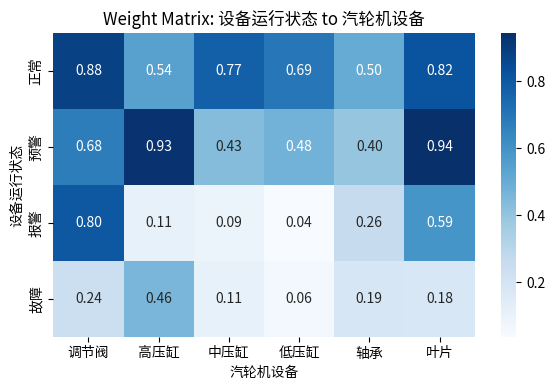

Heatmap saved to your Google Drive as status_equipment_heatmap.svg


In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract nodes for "设备运行状态" and "汽轮机设备"
query_nodes_status = "MATCH (n:设备运行状态) RETURN n.name AS name"
nodes_status_result = graph.run(query_nodes_status).data()
nodes_status = [item['name'] for item in nodes_status_result]

query_nodes_equipment = "MATCH (n:汽轮机设备) RETURN n.name AS name"
nodes_equipment_result = graph.run(query_nodes_equipment).data()
nodes_equipment = [item['name'] for item in nodes_equipment_result]

# Create a mapping from node name to index
status_to_index = {name: i for i, name in enumerate(nodes_status)}
equipment_to_index = {name: i for i, name in enumerate(nodes_equipment)}

# Initialize the weight matrix with zeros
weight_matrix = np.zeros((len(nodes_status), len(nodes_equipment)))

# Extract relationships and their weights
query_relationships = """
MATCH (a:汽轮机设备)-[r:has_status]->(b:设备运行状态)
RETURN a.name AS source, b.name AS target, r.weight AS weight
"""
relationships_result = graph.run(query_relationships).data()

# Populate the weight matrix
for rel in relationships_result:
    source_name = rel['source']
    target_name = rel['target']
    weight = rel['weight']
    if source_name in equipment_to_index and target_name in status_to_index:
        i = status_to_index[target_name]
        j = equipment_to_index[source_name]
        weight_matrix[i, j] = weight

print("Weight Matrix extracted:")
print(weight_matrix)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weight_matrix, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=nodes_equipment, yticklabels=nodes_status)
plt.xlabel("汽轮机设备")
plt.ylabel("设备运行状态")
plt.title("Weight Matrix: 设备运行状态 to 汽轮机设备")

# Save the figure to Google Drive
plt.savefig('/content/drive/My Drive/status_equipment_heatmap.svg', format='svg')

plt.tight_layout()
plt.show()

print("Heatmap saved to your Google Drive as status_equipment_heatmap.svg")

## 0+.3. 运行状态 - 故障模式
- Prompt: Please help me create a node class "设备故障模式", including nodes ["锅炉燃烧效率低", "蒸汽压力波动超限", "高压缸排气温度超限", "轴承断裂", "末级叶片结垢"]; then connect these nodes to the nodes in previous class "设备运行状态", including nodes ["正常", "预警", "报警", "故障"], with edges (relationship). The attribute of edges (relationships) are randomly-assigned importance weights, values between 0 and 1.

In [11]:
import random

# Define the new node class and its members
new_node_class = {
    "设备故障模式": ["锅炉燃烧效率低", "蒸汽压力波动超限", "高压缸排气温度超限", "轴承断裂", "末级叶片结垢"]
}

# Create the new nodes
for label, names in new_node_class.items():
    for name in names:
        node = Node(label, name=name)
        graph.create(node)

# Create relationships with random weights
for fault_name in new_node_class["设备故障模式"]:
    for status_name in ["正常", "预警", "报警", "故障"]:
        fault_node = graph.nodes.match("设备故障模式", name=fault_name).first()
        status_node = graph.nodes.match("设备运行状态", name=status_name).first()

        # Assign a random weight between 0 and 1
        weight = random.random()

        # Create a relationship
        relationship = Relationship(status_node, "can_lead_to", fault_node, weight=weight)
        graph.create(relationship)

print("New nodes and relationships created successfully.")

New nodes and relationships created successfully.


- Prompt: Please help me obtain the weight matrix between "设备运行状态" and "设备故障模式", then visualize the weight matrix using seaborn-heatmap, and save the heatmap figure to my drive in svg format. Speicfic requirements following: (1) figsize=(6,4), (2) tight_layout=True, (3) cmap='Blues'.

Weight Matrix extracted:
[[0.26816242 0.99537858 0.26919159 0.79568127 0.71395976]
 [0.18040697 0.42205627 0.81669497 0.7712436  0.24973331]
 [0.54759277 0.05730746 0.17352532 0.62238345 0.91739129]
 [0.01406179 0.98980828 0.86080005 0.18568422 0.24135708]]


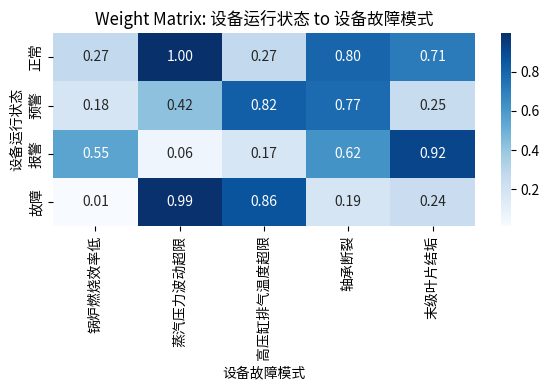

Heatmap saved to your Google Drive as status_fault_heatmap.svg


In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract nodes for "设备运行状态" and "设备故障模式"
query_nodes_status = "MATCH (n:设备运行状态) RETURN n.name AS name"
nodes_status_result = graph.run(query_nodes_status).data()
nodes_status = [item['name'] for item in nodes_status_result]

query_nodes_fault = "MATCH (n:设备故障模式) RETURN n.name AS name"
nodes_fault_result = graph.run(query_nodes_fault).data()
nodes_fault = [item['name'] for item in nodes_fault_result]

# Create a mapping from node name to index
status_to_index = {name: i for i, name in enumerate(nodes_status)}
fault_to_index = {name: i for i, name in enumerate(nodes_fault)}

# Initialize the weight matrix with zeros
weight_matrix = np.zeros((len(nodes_status), len(nodes_fault)))

# Extract relationships and their weights
query_relationships = """
MATCH (a:设备运行状态)-[r:can_lead_to]->(b:设备故障模式)
RETURN a.name AS source, b.name AS target, r.weight AS weight
"""
relationships_result = graph.run(query_relationships).data()

# Populate the weight matrix
for rel in relationships_result:
    source_name = rel['source']
    target_name = rel['target']
    weight = rel['weight']
    if source_name in status_to_index and target_name in fault_to_index:
        i = status_to_index[source_name]
        j = fault_to_index[target_name]
        weight_matrix[i, j] = weight

print("Weight Matrix extracted:")
print(weight_matrix)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weight_matrix, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=nodes_fault, yticklabels=nodes_status)
plt.xlabel("设备故障模式")
plt.ylabel("设备运行状态")
plt.title("Weight Matrix: 设备运行状态 to 设备故障模式")

# Save the figure to Google Drive
plt.savefig('/content/drive/My Drive/status_fault_heatmap.svg', format='svg')

plt.tight_layout()
plt.show()

print("Heatmap saved to your Google Drive as status_fault_heatmap.svg")

## 0+.4. 故障模式 - 运维优化目标
- Prompt: Please help me create a node class "运维优化目标", including nodes ["设备基本性能", "剩余安全寿命", "平均维修间隔期", "运行时间可用度", "生产能力", "可靠度", "运行安全性", "输出成品质量", "运维成本收益", "设备运行能效比"]; then connect these nodes to the nodes in previous class "设备故障模式", including nodes ["锅炉燃烧效率低", "蒸汽压力波动超限", "高压缸排气温度超限", "轴承断裂", "末级叶片结垢"], with edges (relationship). The attribute of edges (relationships) are randomly-assigned importance weights, values between 0 and 1.

In [12]:
import random

# Define the new node class and its members
new_node_class = {
    "运维优化目标": ["设备基本性能", "剩余安全寿命", "平均维修间隔期", "运行时间可用度", "生产能力", "可靠度", "运行安全性", "输出成品质量", "运维成本收益", "设备运行能效比"]
}

# Create the new nodes
for label, names in new_node_class.items():
    for name in names:
        node = Node(label, name=name)
        graph.create(node)

# Create relationships with random weights
for target_name in new_node_class["运维优化目标"]:
    for fault_name in ["锅炉燃烧效率低", "蒸汽压力波动超限", "高压缸排气温度超限", "轴承断裂", "末级叶片结垢"]:
        target_node = graph.nodes.match("运维优化目标", name=target_name).first()
        fault_node = graph.nodes.match("设备故障模式", name=fault_name).first()

        # Assign a random weight between 0 and 1
        weight = random.random()

        # Create a relationship
        relationship = Relationship(fault_node, "impacts", target_node, weight=weight)
        graph.create(relationship)

print("New nodes and relationships created successfully.")

New nodes and relationships created successfully.


- Prompt: Please help me obtain the weight matrix between "设备故障模式" and "运维优化目标", then visualize the weight matrix using seaborn-heatmap, and save the heatmap figure to my drive in svg format. Speicfic requirements following: (1) figsize=(6,4), (2) tight_layout=True, (3) cmap='Blues'.

Weight Matrix extracted:
[[0.97653203 0.18575206 0.35913767 0.08395063 0.83518864 0.98994409
  0.52299103 0.55938739 0.04765457 0.68450627]
 [0.07310401 0.6026726  0.82993825 0.29256813 0.00364958 0.68272979
  0.72667102 0.92783823 0.86520056 0.37660297]
 [0.84165088 0.35443674 0.50564162 0.03918035 0.90509173 0.72277313
  0.99943599 0.21357139 0.0015445  0.84353102]
 [0.39690732 0.40090767 0.24929127 0.96080675 0.38972106 0.67930912
  0.28064854 0.36187072 0.94325102 0.70473802]
 [0.83164713 0.2553235  0.8386638  0.840898   0.50150634 0.04223139
  0.78047767 0.35284006 0.89364033 0.22794966]]


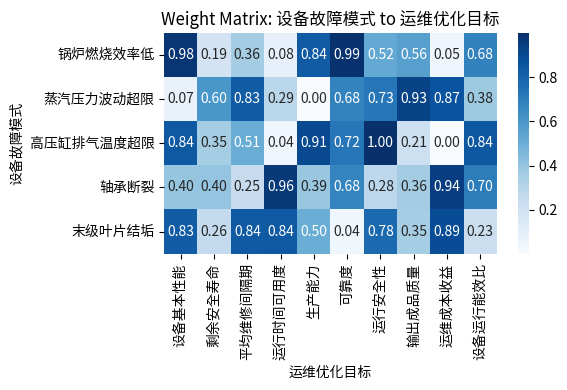

Heatmap saved to your Google Drive as fault_target_heatmap.svg


In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract nodes for "设备故障模式" and "运维优化目标"
query_nodes_fault = "MATCH (n:设备故障模式) RETURN n.name AS name"
nodes_fault_result = graph.run(query_nodes_fault).data()
nodes_fault = [item['name'] for item in nodes_fault_result]

query_nodes_target = "MATCH (n:运维优化目标) RETURN n.name AS name"
nodes_target_result = graph.run(query_nodes_target).data()
nodes_target = [item['name'] for item in nodes_target_result]

# Create a mapping from node name to index
fault_to_index = {name: i for i, name in enumerate(nodes_fault)}
target_to_index = {name: i for i, name in enumerate(nodes_target)}

# Initialize the weight matrix with zeros
weight_matrix = np.zeros((len(nodes_fault), len(nodes_target)))

# Extract relationships and their weights
query_relationships = """
MATCH (a:设备故障模式)-[r:impacts]->(b:运维优化目标)
RETURN a.name AS source, b.name AS target, r.weight AS weight
"""
relationships_result = graph.run(query_relationships).data()

# Populate the weight matrix
for rel in relationships_result:
    source_name = rel['source']
    target_name = rel['target']
    weight = rel['weight']
    if source_name in fault_to_index and target_name in target_to_index:
        i = fault_to_index[source_name]
        j = target_to_index[target_name]
        weight_matrix[i, j] = weight

print("Weight Matrix extracted:")
print(weight_matrix)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weight_matrix, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=nodes_target, yticklabels=nodes_fault)
plt.xlabel("运维优化目标")
plt.ylabel("设备故障模式")
plt.title("Weight Matrix: 设备故障模式 to 运维优化目标")

# Save the figure to Google Drive
plt.savefig('/content/drive/My Drive/fault_target_heatmap.svg', format='svg')

plt.tight_layout()
plt.show()

print("Heatmap saved to your Google Drive as fault_target_heatmap.svg")

## 0+.5. 生产需求 - 运维优化目标
- Prompt: Please help me create a node class "生产需求", including nodes ["迎峰度夏", "供热季", "调峰运行", "节能降耗"]; then draw connections from these nodes to the nodes in previous class "运维优化目标", including nodes ["设备基本性能", "剩余安全寿命", "平均维修间隔期", "运行时间可用度", "生产能力", "可靠度", "运行安全性", "输出成品质量", "运维成本收益", "设备运行能效比"], with edges (relationship). The attribute of edges (relationships) are randomly-assigned importance weights, values between 0 and 1.

In [13]:
import random

# Define the new node class and its members
new_node_class = {
    "生产需求": ["迎峰度夏", "供热季", "调峰运行", "节能降耗"]
}

# Create the new nodes
for label, names in new_node_class.items():
    for name in names:
        node = Node(label, name=name)
        graph.create(node)

# Create relationships with random weights
for demand_name in new_node_class["生产需求"]:
    for target_name in ["设备基本性能", "剩余安全寿命", "平均维修间隔期", "运行时间可用度", "生产能力", "可靠度", "运行安全性", "输出成品质量", "运维成本收益", "设备运行能效比"]:
        demand_node = graph.nodes.match("生产需求", name=demand_name).first()
        target_node = graph.nodes.match("运维优化目标", name=target_name).first()

        # Assign a random weight between 0 and 1
        weight = random.random()

        # Create a relationship
        relationship = Relationship(demand_node, "drives", target_node, weight=weight)
        graph.create(relationship)

print("New nodes and relationships created successfully.")

New nodes and relationships created successfully.


- Prompt: Please help me obtain the weight matrix between "生产需求" and "运维优化目标", then visualize the weight matrix using seaborn-heatmap, and save the heatmap figure to my drive in svg format. Speicfic requirements following: (1) figsize=(6,4), (2) tight_layout=True, (3) cmap='Blues'.

Weight Matrix extracted:
[[0.79436824 0.87714641 0.50817513 0.87338007 0.62853203 0.33101292
  0.21824974 0.75267905 0.63943159 0.44520096]
 [0.99087638 0.60324215 0.23715138 0.52721746 0.05363552 0.18315299
  0.61323403 0.0275123  0.64383589 0.93211627]
 [0.39549233 0.6633962  0.89733602 0.1465173  0.85473504 0.57823585
  0.16139786 0.27918606 0.15091308 0.63666568]
 [0.8483327  0.82511529 0.30467696 0.57122389 0.47730587 0.60060929
  0.84410264 0.31962376 0.62710434 0.81861915]]


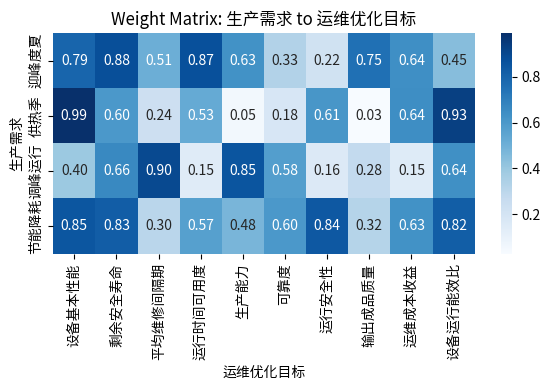

Heatmap saved to your Google Drive as demand_target_heatmap.svg


In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract nodes for "生产需求" and "运维优化目标"
query_nodes_demand = "MATCH (n:生产需求) RETURN n.name AS name"
nodes_demand_result = graph.run(query_nodes_demand).data()
nodes_demand = [item['name'] for item in nodes_demand_result]

query_nodes_target = "MATCH (n:运维优化目标) RETURN n.name AS name"
nodes_target_result = graph.run(query_nodes_target).data()
nodes_target = [item['name'] for item in nodes_target_result]

# Create a mapping from node name to index
demand_to_index = {name: i for i, name in enumerate(nodes_demand)}
target_to_index = {name: i for i, name in enumerate(nodes_target)}

# Initialize the weight matrix with zeros
weight_matrix = np.zeros((len(nodes_demand), len(nodes_target)))

# Extract relationships and their weights
query_relationships = """
MATCH (a:生产需求)-[r:drives]->(b:运维优化目标)
RETURN a.name AS source, b.name AS target, r.weight AS weight
"""
relationships_result = graph.run(query_relationships).data()

# Populate the weight matrix
for rel in relationships_result:
    source_name = rel['source']
    target_name = rel['target']
    weight = rel['weight']
    if source_name in demand_to_index and target_name in target_to_index:
        i = demand_to_index[source_name]
        j = target_to_index[target_name]
        weight_matrix[i, j] = weight

print("Weight Matrix extracted:")
print(weight_matrix)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weight_matrix, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=nodes_target, yticklabels=nodes_demand)
plt.xlabel("运维优化目标")
plt.ylabel("生产需求")
plt.title("Weight Matrix: 生产需求 to 运维优化目标")

# Save the figure to Google Drive
plt.savefig('/content/drive/My Drive/demand_target_heatmap.svg', format='svg')

plt.tight_layout()
plt.show()

print("Heatmap saved to your Google Drive as demand_target_heatmap.svg")

## 0+.6. 运维策略优化方法 - 运维优化目标
- Prompt: Please help me create a node class "运维策略优化方法", including nodes ["运行模式控制", "生产物料流调度", "能量流调度", "设备预测性维护"]; then draw connections from these nodes to the nodes in previous class "运维优化目标", including nodes ["设备基本性能", "剩余安全寿命", "平均维修间隔期", "运行时间可用度", "生产能力", "可靠度", "运行安全性", "输出成品质量", "运维成本收益", "设备运行能效比"], with edges (relationship). The attribute of edges (relationships) are randomly-assigned importance weights, values between 0 and 1.

In [14]:
import random

# Define the new node class and its members
new_node_class = {
    "运维策略优化方法": ["运行模式控制", "生产物料流调度", "能量流调度", "设备预测性维护"]
}

# Create the new nodes
for label, names in new_node_class.items():
    for name in names:
        node = Node(label, name=name)
        graph.create(node)

# Create relationships with random weights
for method_name in new_node_class["运维策略优化方法"]:
    for target_name in ["设备基本性能", "剩余安全寿命", "平均维修间隔期", "运行时间可用度", "生产能力", "可靠度", "运行安全性", "输出成品质量", "运维成本收益", "设备运行能效比"]:
        method_node = graph.nodes.match("运维策略优化方法", name=method_name).first()
        target_node = graph.nodes.match("运维优化目标", name=target_name).first()

        # Assign a random weight between 0 and 1
        weight = random.random()

        # Create a relationship
        relationship = Relationship(method_node, "optimizes", target_node, weight=weight)
        graph.create(relationship)

print("New nodes and relationships created successfully.")

New nodes and relationships created successfully.


- Prompt: Please help me obtain the weight matrix between "运维策略优化方法" and "运维优化目标", then visualize the weight matrix using seaborn-heatmap, and save the heatmap figure to my drive in svg format. Speicfic requirements following: (1) figsize=(6,4), (2) tight_layout=True, (3) cmap='Blues'.

Weight Matrix extracted:
[[0.13267794 0.54259104 0.82029514 0.03899904 0.69526731 0.86643337
  0.37730399 0.72325751 0.43399764 0.13904033]
 [0.61706283 0.51257384 0.39570062 0.60097851 0.57905911 0.55571332
  0.70213662 0.50325389 0.39007593 0.62384442]
 [0.33470715 0.98395347 0.54798468 0.3499601  0.03415359 0.306911
  0.88750674 0.16116025 0.20666505 0.94283512]
 [0.0748215  0.90564268 0.29981186 0.86167813 0.27580973 0.01826417
  0.36449243 0.8177699  0.92704566 0.86904163]]


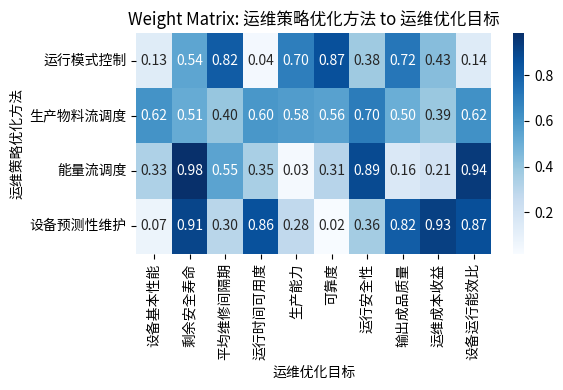

Heatmap saved to your Google Drive as method_target_heatmap.svg


In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Extract nodes for "运维策略优化方法" and "运维优化目标"
query_nodes_method = "MATCH (n:运维策略优化方法) RETURN n.name AS name"
nodes_method_result = graph.run(query_nodes_method).data()
nodes_method = [item['name'] for item in nodes_method_result]

query_nodes_target = "MATCH (n:运维优化目标) RETURN n.name AS name"
nodes_target_result = graph.run(query_nodes_target).data()
nodes_target = [item['name'] for item in nodes_target_result]

# Create a mapping from node name to index
method_to_index = {name: i for i, name in enumerate(nodes_method)}
target_to_index = {name: i for i, name in enumerate(nodes_target)}

# Initialize the weight matrix with zeros
weight_matrix = np.zeros((len(nodes_method), len(nodes_target)))

# Extract relationships and their weights
query_relationships = """
MATCH (a:运维策略优化方法)-[r:optimizes]->(b:运维优化目标)
RETURN a.name AS source, b.name AS target, r.weight AS weight
"""
relationships_result = graph.run(query_relationships).data()

# Populate the weight matrix
for rel in relationships_result:
    source_name = rel['source']
    target_name = rel['target']
    weight = rel['weight']
    if source_name in method_to_index and target_name in target_to_index:
        i = method_to_index[source_name]
        j = target_to_index[target_name]
        weight_matrix[i, j] = weight

print("Weight Matrix extracted:")
print(weight_matrix)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weight_matrix, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=nodes_target, yticklabels=nodes_method)
plt.xlabel("运维优化目标")
plt.ylabel("运维策略优化方法")
plt.title("Weight Matrix: 运维策略优化方法 to 运维优化目标")

# Save the figure to Google Drive
plt.savefig('/content/drive/My Drive/method_target_heatmap.svg', format='svg')

plt.tight_layout()
plt.show()

print("Heatmap saved to your Google Drive as method_target_heatmap.svg")

### 1. Initialization: Read DataFrame from Google drive

- `df_fund`: 设备基础信息数据库：`['专业', '系统', '设备', '总体']`
- `df_moni`: 设备故障及监测信息数据库：`["系统", "设备", "故障现象", "故障原因", "原因归类", "部件", "隐患等级", "监测技术"]`

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# prompt: Use pandas to read csv file from my Google drive.

df_fund = pd.read_csv('/content/drive/My Drive/Colab Notebooks/_KG_data_reliance_20250610/data_prcs_equip_fandamental.csv')
df_moni = pd.read_csv('/content/drive/My Drive/Colab Notebooks/_KG_data_reliance_20250610/data_prcs_failure_n_monitoring_utf8.csv')

In [ ]:
df_fund

,专业,系统,设备,总体
0,汽机,汽轮机本体,汽轮机本体,汽机设备
1,汽机,汽轮机本体,汽轮机本体疏水气控阀门,汽机设备
2,汽机,汽轮机本体,汽轮机本体疏水手动阀门,汽机设备
3,汽机,调速保安系统,高压自动主汽门,汽机设备
4,汽机,调速保安系统,高压调速汽门,汽机设备
...,...,...,...,...
125,化学,水电解制氢装置,氢气储存罐储罐安全阀,汽机设备
126,化学,水电解制氢装置,制氢装置,汽机设备
127,化学,水电解制氢装置,化学制氢碱液循环泵,汽机设备
128,化学,水电解制氢装置,化学制氢站送水泵,汽机设备


In [ ]:
df_moni

,系统,设备,故障现象,故障原因,原因归类,部件,隐患等级,监测技术
0,汽轮机本体及疏水系统,汽轮机本体,汽轮机轴承振动大,轴系质量不平衡,检修不良,转子,子分公司级隐患,安全完整性分析监测技术
1,汽轮机本体及疏水系统,汽轮机本体,汽轮机轴承振动大,对轮不同心,检修不良,对轮,子分公司级隐患,安全完整性分析监测技术
2,汽轮机本体及疏水系统,汽轮机本体,汽轮机轴承振动大,转子弯曲,检修不良,转子,子分公司级隐患,安全完整性分析监测技术
3,汽轮机本体及疏水系统,汽轮机本体,汽轮机轴承振动大,轴承顶隙过大、瓦盖紧力偏小或垫铁接触不良,检修不良,轴承,子分公司级隐患,安全完整性分析监测技术
4,汽轮机本体及疏水系统,汽轮机本体,汽轮机轴承振动大,对轮晃度、飘偏度超标,检修不良,对轮,子分公司级隐患,安全完整性分析监测技术
...,...,...,...,...,...,...,...,...
58,汽轮机本体及疏水系统,汽轮机本体疏水手动阀门,本体疏水手动阀门外漏,自密封填料、盘根填料老化,检修不良,填料,设备缺陷,时序序列关联监测技术
59,汽轮机本体及疏水系统,汽轮机本体疏水手动阀门,本体疏水手动阀门外漏,阀门阀体裂纹或砂眼,制造不良,阀体,设备缺陷,时序序列关联监测技术
60,汽轮机本体及疏水系统,汽轮机本体疏水手动阀门,本体疏水手动阀门内漏,阀门密封面磨损或夹有杂物,检修不良,阀芯及组件,设备缺陷,时序序列关联监测技术
61,汽轮机本体及疏水系统,汽轮机本体疏水手动阀门,本体疏水手动阀门内漏,阀门阀芯阀座密封型线不好,检修不良,阀芯及组件,设备缺陷,时序序列关联监测技术


### 2. Experiment based on Equipment fandamental information `df_fund`

#### 2.1. Fundamental

In [ ]:
from tqdm import tqdm

# 清空数据库以防重复
graph.delete_all()

#### 2.1. Pairing of `专业-系统`

##### 2.1.1. Nodes & Relationship Creation

In [ ]:
# 提取列名
# Original: ['专业', '系统', '设备', '总体'] for df.fund
# ["系统", "设备", "故障现象", "故障原因", "原因归类", "部件", "隐患等级", "监测技术"] for df_moni
# columns = ["系统", "设备", "", "", "", "", "", ""]
columns = ["专业", "系统"]

name0 = columns[0]
name1 = columns[1]

df = df_fund[columns]

# 去重处理，防止重复节点和关系
unique_nodes = {col: set(df[col].dropna().unique()) for col in columns}

print("-> Creating Nodes ...")

# 创建节点
node_dict = {col: {} for col in columns}  # 用于存储节点对象以便快速查询
for col in tqdm(columns):
    for value in unique_nodes[col]:
        node = Node(col, name=value)
        graph.create(node)
        node_dict[col][value] = node

print(f"-> Creating {name0}_TO_{name1} Relationships...")

# 创建关系
for _, row in tqdm(df.iterrows()):
    values = {col: row[col] for col in columns if not pd.isna(row[col])}

    # 创建 name0_TO_name1 关系
    if name0 in values and name1 in values:
        src_node = node_dict[name0][values[name0]]
        tgt_node = node_dict[name1][values[name1]]
        rel = Relationship.type(f"{name0}_TO_{name1}")
        graph.merge(rel(src_node, tgt_node))

print(f"-> {name0}_TO_{name1} Relationship Created!")

##### 2.1.2. Weight Assigning:
- 基于元素配对在数据集中的出现次数, 为节点间的关系分配权重

In [ ]:
# prompt: Based on the code above, assign a weight to each name0-name1 pair and add it as an attribute.

# Recalculate the relationships and add a weight attribute
print(f"-> Recalculating {name0}_TO_{name1} Relationships with Weights...")

# Count occurrences of each pair to determine weight
pair_counts = df.groupby(columns).size().reset_index(name='weight')

# Create or update relationships with weights
for _, row in tqdm(pair_counts.iterrows()):
    src_value = row[name0]
    tgt_value = row[name1]
    weight = int(row['weight'])  # Ensure weight is an integer

    src_node = node_dict[name0][src_value]
    tgt_node = node_dict[name1][tgt_value]
    rel_type = f"{name0}_TO_{name1}"

    # Create or merge the relationship with the weight property
    # Using MERGE will find the relationship if it exists and update its properties,
    # or create it if it doesn't exist.
    query = f"""
    MATCH (a:{name0} {{name: $src_name}}), (b:{name1} {{name: $tgt_name}})
    MERGE (a)-[r:{rel_type}]->(b)
    SET r.weight = $weight
    """
    graph.run(query, src_name=src_value, tgt_name=tgt_value, weight=weight)

print(f"-> {name0}_TO_{name1} Relationships Updated with Weights!")

In [ ]:
# prompt: Based on the codes above, extract a weight matrix between name0 and name1, and plot a heatmap in matplotlib.

import numpy as np

# import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Extract nodes for name0 and name1
query_nodes_name0 = f"MATCH (n:{name0}) RETURN n.name AS name"
nodes_name0_result = graph.run(query_nodes_name0).data()
nodes_name0 = [item['name'] for item in nodes_name0_result]

query_nodes_name1 = f"MATCH (n:{name1}) RETURN n.name AS name"
nodes_name1_result = graph.run(query_nodes_name1).data()
nodes_name1 = [item['name'] for item in nodes_name1_result]

# Create a mapping from node name to index
name0_to_index = {name: i for i, name in enumerate(nodes_name0)}
name1_to_index = {name: i for i, name in enumerate(nodes_name1)}

# Initialize the weight matrix with zeros
weight_matrix = np.zeros((len(nodes_name0), len(nodes_name1)), dtype=int)

# Extract relationships and their weights
query_relationships = f"""
MATCH (a:{name0})-[r:{name0}_TO_{name1}]->(b:{name1})
RETURN a.name AS source, b.name AS target, r.weight AS weight
"""
relationships_result = graph.run(query_relationships).data()

# Populate the weight matrix
for rel in relationships_result:
    source_name = rel['source']
    target_name = rel['target']
    weight = rel['weight']
    if source_name in name0_to_index and target_name in name1_to_index:
        i = name0_to_index[source_name]
        j = name1_to_index[target_name]
        weight_matrix[i, j] = weight

print("Weight Matrix extracted:")
print(weight_matrix)

# Plot the heatmap
plt.figure(figsize=(24, 16))

sns.heatmap(weight_matrix, annot=False, fmt="d", cmap="RdPu",
            xticklabels=nodes_name1, yticklabels=nodes_name0)
plt.xlabel(name1)
plt.ylabel(name0)

plt.title(f"Weight Matrix: {name0} to {name1}")

plt.tight_layout()
plt.show()


#### 2.2. Pairing of `系统-设备`



##### 2.2.1. Node & Relationship Creation

In [ ]:
# 提取列名
# Original: ['专业', '系统', '设备', '总体'] for df.fund
# ["系统", "设备", "故障现象", "故障原因", "原因归类", "部件", "隐患等级", "监测技术"] for df_moni
# columns = ["系统", "设备", "", "", "", "", "", ""]
columns = ["系统", "设备"]

name0 = columns[0]
name1 = columns[1]

df = df_fund[columns]

# 去重处理，防止重复节点和关系
unique_nodes = {col: set(df[col].dropna().unique()) for col in columns}

print("-> Creating Nodes ...")

# 创建节点
node_dict = {col: {} for col in columns}  # 用于存储节点对象以便快速查询
for col in tqdm(columns):
    for value in unique_nodes[col]:
        node = Node(col, name=value)
        graph.create(node)
        node_dict[col][value] = node

print(f"-> Creating {name0}_TO_{name1} Relationships...")

# 创建关系
for _, row in tqdm(df.iterrows()):
    values = {col: row[col] for col in columns if not pd.isna(row[col])}

    # 创建 name0_TO_name1 关系
    if name0 in values and name1 in values:
        src_node = node_dict[name0][values[name0]]
        tgt_node = node_dict[name1][values[name1]]
        rel = Relationship.type(f"{name0}_TO_{name1}")
        graph.merge(rel(src_node, tgt_node))

print(f"-> {name0}_TO_{name1} Relationship Created!")

##### 2.2.2. Weight Assigning

- 基于元素配对在数据集中的出现次数, 为节点间的关系分配权重

In [ ]:
# prompt: Based on the code above, assign a weight to each name0-name1 pair and add it as an attribute.

# Recalculate the relationships and add a weight attribute
print(f"-> Recalculating {name0}_TO_{name1} Relationships with Weights...")

# Count occurrences of each pair to determine weight
pair_counts = df.groupby(columns).size().reset_index(name='weight')

# Create or update relationships with weights
for _, row in tqdm(pair_counts.iterrows()):
    src_value = row[name0]
    tgt_value = row[name1]
    weight = int(row['weight'])  # Ensure weight is an integer

    src_node = node_dict[name0][src_value]
    tgt_node = node_dict[name1][tgt_value]
    rel_type = f"{name0}_TO_{name1}"

    # Create or merge the relationship with the weight property
    # Using MERGE will find the relationship if it exists and update its properties,
    # or create it if it doesn't exist.
    query = f"""
    MATCH (a:{name0} {{name: $src_name}}), (b:{name1} {{name: $tgt_name}})
    MERGE (a)-[r:{rel_type}]->(b)
    SET r.weight = $weight
    """
    graph.run(query, src_name=src_value, tgt_name=tgt_value, weight=weight)

print(f"-> {name0}_TO_{name1} Relationships Updated with Weights!")

In [ ]:
# prompt: Based on the codes above, extract a weight matrix between name0 and name1, and plot a heatmap in matplotlib.

import numpy as np

# import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Extract nodes for name0 and name1
query_nodes_name0 = f"MATCH (n:{name0}) RETURN n.name AS name"
nodes_name0_result = graph.run(query_nodes_name0).data()
nodes_name0 = [item['name'] for item in nodes_name0_result]

query_nodes_name1 = f"MATCH (n:{name1}) RETURN n.name AS name"
nodes_name1_result = graph.run(query_nodes_name1).data()
nodes_name1 = [item['name'] for item in nodes_name1_result]

# Create a mapping from node name to index
name0_to_index = {name: i for i, name in enumerate(nodes_name0)}
name1_to_index = {name: i for i, name in enumerate(nodes_name1)}

# Initialize the weight matrix with zeros
weight_matrix = np.zeros((len(nodes_name0), len(nodes_name1)), dtype=int)

# Extract relationships and their weights
query_relationships = f"""
MATCH (a:{name0})-[r:{name0}_TO_{name1}]->(b:{name1})
RETURN a.name AS source, b.name AS target, r.weight AS weight
"""
relationships_result = graph.run(query_relationships).data()

# Populate the weight matrix
for rel in relationships_result:
    source_name = rel['source']
    target_name = rel['target']
    weight = rel['weight']
    if source_name in name0_to_index and target_name in name1_to_index:
        i = name0_to_index[source_name]
        j = name1_to_index[target_name]
        weight_matrix[i, j] = weight

print("Weight Matrix extracted:")
print(weight_matrix)

# Plot the heatmap
plt.figure(figsize=(24, 16))

sns.heatmap(weight_matrix, annot=False, fmt="d", cmap="RdPu",
            xticklabels=nodes_name1, yticklabels=nodes_name0)
plt.xlabel(name1)
plt.ylabel(name0)

plt.title(f"Weight Matrix: {name0} to {name1}")

plt.tight_layout()
plt.show()


### 3. Experiment based on Equipment Monitoring Dataset `df_moni`

In [ ]:
from tqdm import tqdm

# 清空数据库以防重复
graph.delete_all()

#### 3.1. Pairing of `系统-设备`


##### 3.1.1. Nodes & Relationship Creation

In [ ]:
# 提取列名
# Original: ['专业', '系统', '设备', '总体'] for df.fund
# ["系统", "设备", "故障现象", "故障原因", "原因归类", "部件", "隐患等级", "监测技术"] for df_moni
# columns = ["系统", "设备", "", "", "", "", "", ""]
columns = ["系统", "设备"]

name0 = columns[0]
name1 = columns[1]

df = df_moni[columns]

# 去重处理，防止重复节点和关系
unique_nodes = {col: set(df[col].dropna().unique()) for col in columns}

print("-> Creating Nodes ...")

# 创建节点
node_dict = {col: {} for col in columns}  # 用于存储节点对象以便快速查询
for col in tqdm(columns):
    for value in unique_nodes[col]:
        node = Node(col, name=value)
        graph.create(node)
        node_dict[col][value] = node

print(f"-> Creating {name0}_TO_{name1} Relationships...")

# 创建关系
for _, row in tqdm(df.iterrows()):
    values = {col: row[col] for col in columns if not pd.isna(row[col])}

    # 创建 name0_TO_name1 关系
    if name0 in values and name1 in values:
        src_node = node_dict[name0][values[name0]]
        tgt_node = node_dict[name1][values[name1]]
        rel = Relationship.type(f"{name0}_TO_{name1}")
        graph.merge(rel(src_node, tgt_node))

print(f"-> {name0}_TO_{name1} Relationship Created!")

-> Creating Nodes ...


100%|██████████| 2/2 [00:02<00:00,  1.28s/it]


-> Creating 系统_TO_设备 Relationships...


63it [00:40,  1.55it/s]

-> 系统_TO_设备 Relationship Created!


##### 3.1.2. Weight Assigning
- 基于元素配对在数据集中的出现次数, 为节点间的关系分配权重

In [ ]:
# prompt: Based on the code above, assign a weight to each name0-name1 pair and add it as an attribute.

# Recalculate the relationships and add a weight attribute
print(f"-> Recalculating {name0}_TO_{name1} Relationships with Weights...")

# Count occurrences of each pair to determine weight
pair_counts = df.groupby(columns).size().reset_index(name='weight')

# Create or update relationships with weights
for _, row in tqdm(pair_counts.iterrows()):
    src_value = row[name0]
    tgt_value = row[name1]
    weight = int(row['weight'])  # Ensure weight is an integer

    src_node = node_dict[name0][src_value]
    tgt_node = node_dict[name1][tgt_value]
    rel_type = f"{name0}_TO_{name1}"

    # Create or merge the relationship with the weight property
    # Using MERGE will find the relationship if it exists and update its properties,
    # or create it if it doesn't exist.
    query = f"""
    MATCH (a:{name0} {{name: $src_name}}), (b:{name1} {{name: $tgt_name}})
    MERGE (a)-[r:{rel_type}]->(b)
    SET r.weight = $weight
    """
    graph.run(query, src_name=src_value, tgt_name=tgt_value, weight=weight)

print(f"-> {name0}_TO_{name1} Relationships Updated with Weights!")

-> Recalculating 系统_TO_设备 Relationships with Weights...


3it [00:00,  3.17it/s]

-> 系统_TO_设备 Relationships Updated with Weights!


Weight Matrix extracted:
[[14 37 12]]


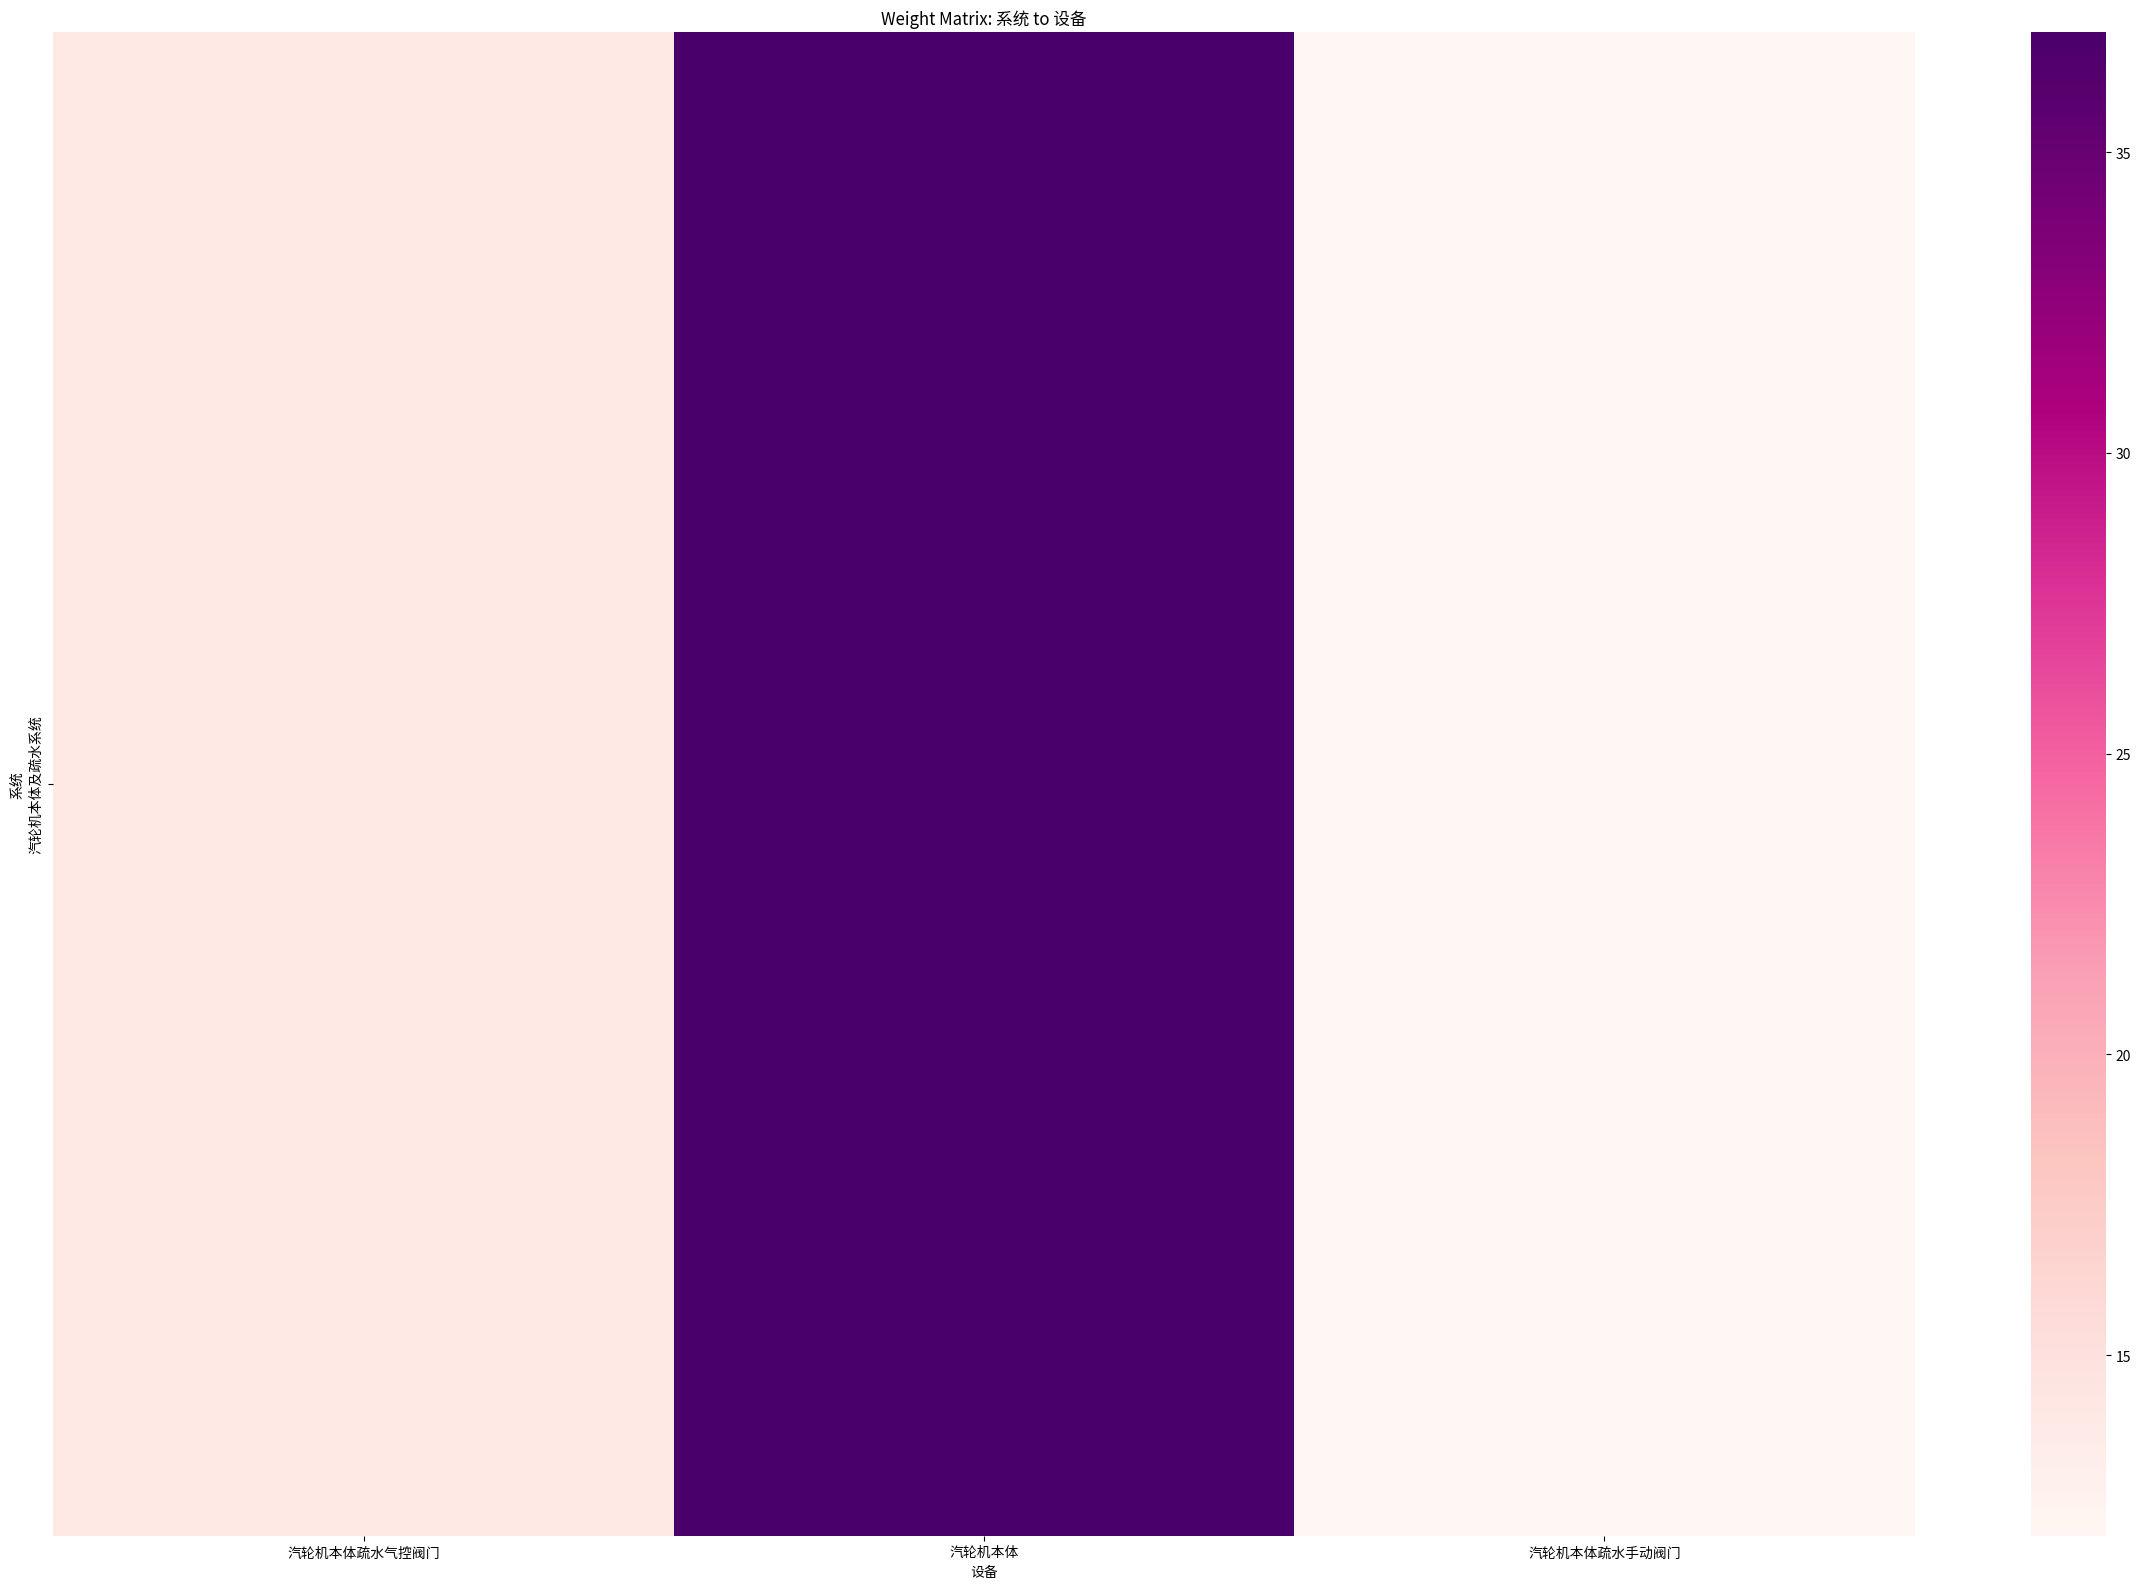

In [ ]:
# prompt: Based on the codes above, extract a weight matrix between name0 and name1, and plot a heatmap in matplotlib.

import numpy as np

# import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Extract nodes for name0 and name1
query_nodes_name0 = f"MATCH (n:{name0}) RETURN n.name AS name"
nodes_name0_result = graph.run(query_nodes_name0).data()
nodes_name0 = [item['name'] for item in nodes_name0_result]

query_nodes_name1 = f"MATCH (n:{name1}) RETURN n.name AS name"
nodes_name1_result = graph.run(query_nodes_name1).data()
nodes_name1 = [item['name'] for item in nodes_name1_result]

# Create a mapping from node name to index
name0_to_index = {name: i for i, name in enumerate(nodes_name0)}
name1_to_index = {name: i for i, name in enumerate(nodes_name1)}

# Initialize the weight matrix with zeros
weight_matrix = np.zeros((len(nodes_name0), len(nodes_name1)), dtype=int)

# Extract relationships and their weights
query_relationships = f"""
MATCH (a:{name0})-[r:{name0}_TO_{name1}]->(b:{name1})
RETURN a.name AS source, b.name AS target, r.weight AS weight
"""
relationships_result = graph.run(query_relationships).data()

# Populate the weight matrix
for rel in relationships_result:
    source_name = rel['source']
    target_name = rel['target']
    weight = rel['weight']
    if source_name in name0_to_index and target_name in name1_to_index:
        i = name0_to_index[source_name]
        j = name1_to_index[target_name]
        weight_matrix[i, j] = weight

print("Weight Matrix extracted:")
print(weight_matrix)

# Plot the heatmap
plt.figure(figsize=(24, 16))

sns.heatmap(weight_matrix, annot=False, fmt="d", cmap="RdPu",
            xticklabels=nodes_name1, yticklabels=nodes_name0)
plt.xlabel(name1)
plt.ylabel(name0)

plt.title(f"Weight Matrix: {name0} to {name1}")

plt.tight_layout()
plt.show()


#### 3.2. Pairing of `设备-故障现象`



##### 3.2.1. Nodes & Relationship Creation

In [ ]:
# 提取列名
# Original: ['专业', '系统', '设备', '总体'] for df.fund
# ["系统", "设备", "故障现象", "故障原因", "原因归类", "部件", "隐患等级", "监测技术"] for df_moni
# columns = ["系统", "设备", "", "", "", "", "", ""]
columns = ["设备", "故障现象"]

name0 = columns[0]
name1 = columns[1]

df = df_moni[columns]

# 去重处理，防止重复节点和关系
unique_nodes = {col: set(df[col].dropna().unique()) for col in columns}

print("-> Creating Nodes ...")

# 创建节点
node_dict = {col: {} for col in columns}  # 用于存储节点对象以便快速查询
for col in tqdm(columns):
    for value in unique_nodes[col]:
        node = Node(col, name=value)
        graph.create(node)
        node_dict[col][value] = node

print(f"-> Creating {name0}_TO_{name1} Relationships...")

# 创建关系
for _, row in tqdm(df.iterrows()):
    values = {col: row[col] for col in columns if not pd.isna(row[col])}

    # 创建 name0_TO_name1 关系
    if name0 in values and name1 in values:
        src_node = node_dict[name0][values[name0]]
        tgt_node = node_dict[name1][values[name1]]
        rel = Relationship.type(f"{name0}_TO_{name1}")
        graph.merge(rel(src_node, tgt_node))

print(f"-> {name0}_TO_{name1} Relationship Created!")

-> Creating Nodes ...


100%|██████████| 2/2 [00:09<00:00,  4.85s/it]


-> Creating 设备_TO_故障现象 Relationships...


63it [00:40,  1.55it/s]

-> 设备_TO_故障现象 Relationship Created!


##### 3.2.2. Weight Assigning
- 基于元素配对在数据集中的出现次数, 为节点间的关系分配权重

In [ ]:
# prompt: Based on the code above, assign a weight to each name0-name1 pair and add it as an attribute.

# Recalculate the relationships and add a weight attribute
print(f"-> Recalculating {name0}_TO_{name1} Relationships with Weights...")

# Count occurrences of each pair to determine weight
pair_counts = df.groupby(columns).size().reset_index(name='weight')

# Create or update relationships with weights
for _, row in tqdm(pair_counts.iterrows()):
    src_value = row[name0]
    tgt_value = row[name1]
    weight = int(row['weight'])  # Ensure weight is an integer

    src_node = node_dict[name0][src_value]
    tgt_node = node_dict[name1][tgt_value]
    rel_type = f"{name0}_TO_{name1}"

    # Create or merge the relationship with the weight property
    # Using MERGE will find the relationship if it exists and update its properties,
    # or create it if it doesn't exist.
    query = f"""
    MATCH (a:{name0} {{name: $src_name}}), (b:{name1} {{name: $tgt_name}})
    MERGE (a)-[r:{rel_type}]->(b)
    SET r.weight = $weight
    """
    graph.run(query, src_name=src_value, tgt_name=tgt_value, weight=weight)

print(f"-> {name0}_TO_{name1} Relationships Updated with Weights!")

-> Recalculating 设备_TO_故障现象 Relationships with Weights...


12it [00:00, 16.13it/s]

-> 设备_TO_故障现象 Relationships Updated with Weights!


In [ ]:
# prompt: Based on the codes above, extract a weight matrix between name0 and name1, and plot a heatmap in matplotlib.

import numpy as np

# import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Extract nodes for name0 and name1
query_nodes_name0 = f"MATCH (n:{name0}) RETURN n.name AS name"
nodes_name0_result = graph.run(query_nodes_name0).data()
nodes_name0 = [item['name'] for item in nodes_name0_result]

query_nodes_name1 = f"MATCH (n:{name1}) RETURN n.name AS name"
nodes_name1_result = graph.run(query_nodes_name1).data()
nodes_name1 = [item['name'] for item in nodes_name1_result]

# Create a mapping from node name to index
name0_to_index = {name: i for i, name in enumerate(nodes_name0)}
name1_to_index = {name: i for i, name in enumerate(nodes_name1)}

# Initialize the weight matrix with zeros
weight_matrix = np.zeros((len(nodes_name0), len(nodes_name1)), dtype=int)

# Extract relationships and their weights
query_relationships = f"""
MATCH (a:{name0})-[r:{name0}_TO_{name1}]->(b:{name1})
RETURN a.name AS source, b.name AS target, r.weight AS weight
"""
relationships_result = graph.run(query_relationships).data()

# Populate the weight matrix
for rel in relationships_result:
    source_name = rel['source']
    target_name = rel['target']
    weight = rel['weight']
    if source_name in name0_to_index and target_name in name1_to_index:
        i = name0_to_index[source_name]
        j = name1_to_index[target_name]
        weight_matrix[i, j] = weight

print("Weight Matrix extracted:")
print(weight_matrix)

# Plot the heatmap
plt.figure(figsize=(24, 16))

sns.heatmap(weight_matrix, annot=False, fmt="d", cmap="RdPu",
            xticklabels=nodes_name1, yticklabels=nodes_name0)
plt.xlabel(name1)
plt.ylabel(name0)

plt.title(f"Weight Matrix: {name0} to {name1}")

plt.tight_layout()
plt.show()


#### 3.3. Pairing of `故障现象-故障原因`



##### 3.2.1. Nodes & Relationship Creation

In [ ]:
# 提取列名
# Original: ['专业', '系统', '设备', '总体'] for df.fund
# ["系统", "设备", "故障现象", "故障原因", "原因归类", "部件", "隐患等级", "监测技术"] for df_moni
# columns = ["系统", "设备", "", "", "", "", "", ""]
columns = ["故障现象", "故障原因"]

name0 = columns[0]
name1 = columns[1]

df = df_moni[columns]

# 去重处理，防止重复节点和关系
unique_nodes = {col: set(df[col].dropna().unique()) for col in columns}

print("-> Creating Nodes ...")

# 创建节点
node_dict = {col: {} for col in columns}  # 用于存储节点对象以便快速查询
for col in tqdm(columns):
    for value in unique_nodes[col]:
        node = Node(col, name=value)
        graph.create(node)
        node_dict[col][value] = node

print(f"-> Creating {name0}_TO_{name1} Relationships...")

# 创建关系
for _, row in tqdm(df.iterrows()):
    values = {col: row[col] for col in columns if not pd.isna(row[col])}

    # 创建 name0_TO_name1 关系
    if name0 in values and name1 in values:
        src_node = node_dict[name0][values[name0]]
        tgt_node = node_dict[name1][values[name1]]
        rel = Relationship.type(f"{name0}_TO_{name1}")
        graph.merge(rel(src_node, tgt_node))

print(f"-> {name0}_TO_{name1} Relationship Created!")

-> Creating Nodes ...


100%|██████████| 2/2 [00:28<00:00, 14.00s/it]


-> Creating 故障现象_TO_故障原因 Relationships...


63it [00:30,  2.04it/s]

-> 故障现象_TO_故障原因 Relationship Created!


##### 3.2.2. Weight Assigning
- 基于元素配对在数据集中的出现次数, 为节点间的关系分配权重

In [ ]:
# prompt: Based on the code above, assign a weight to each name0-name1 pair and add it as an attribute.

# Recalculate the relationships and add a weight attribute
print(f"-> Recalculating {name0}_TO_{name1} Relationships with Weights...")

# Count occurrences of each pair to determine weight
pair_counts = df.groupby(columns).size().reset_index(name='weight')

# Create or update relationships with weights
for _, row in tqdm(pair_counts.iterrows()):
    src_value = row[name0]
    tgt_value = row[name1]
    weight = int(row['weight'])  # Ensure weight is an integer

    src_node = node_dict[name0][src_value]
    tgt_node = node_dict[name1][tgt_value]
    rel_type = f"{name0}_TO_{name1}"

    # Create or merge the relationship with the weight property
    # Using MERGE will find the relationship if it exists and update its properties,
    # or create it if it doesn't exist.
    query = f"""
    MATCH (a:{name0} {{name: $src_name}}), (b:{name1} {{name: $tgt_name}})
    MERGE (a)-[r:{rel_type}]->(b)
    SET r.weight = $weight
    """
    graph.run(query, src_name=src_value, tgt_name=tgt_value, weight=weight)

print(f"-> {name0}_TO_{name1} Relationships Updated with Weights!")

-> Recalculating 故障现象_TO_故障原因 Relationships with Weights...


63it [00:10,  5.99it/s]

-> 故障现象_TO_故障原因 Relationships Updated with Weights!


Weight Matrix extracted:
[[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
  0 1 1 0 0 0 1 1 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
  0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
  0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
  1 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0

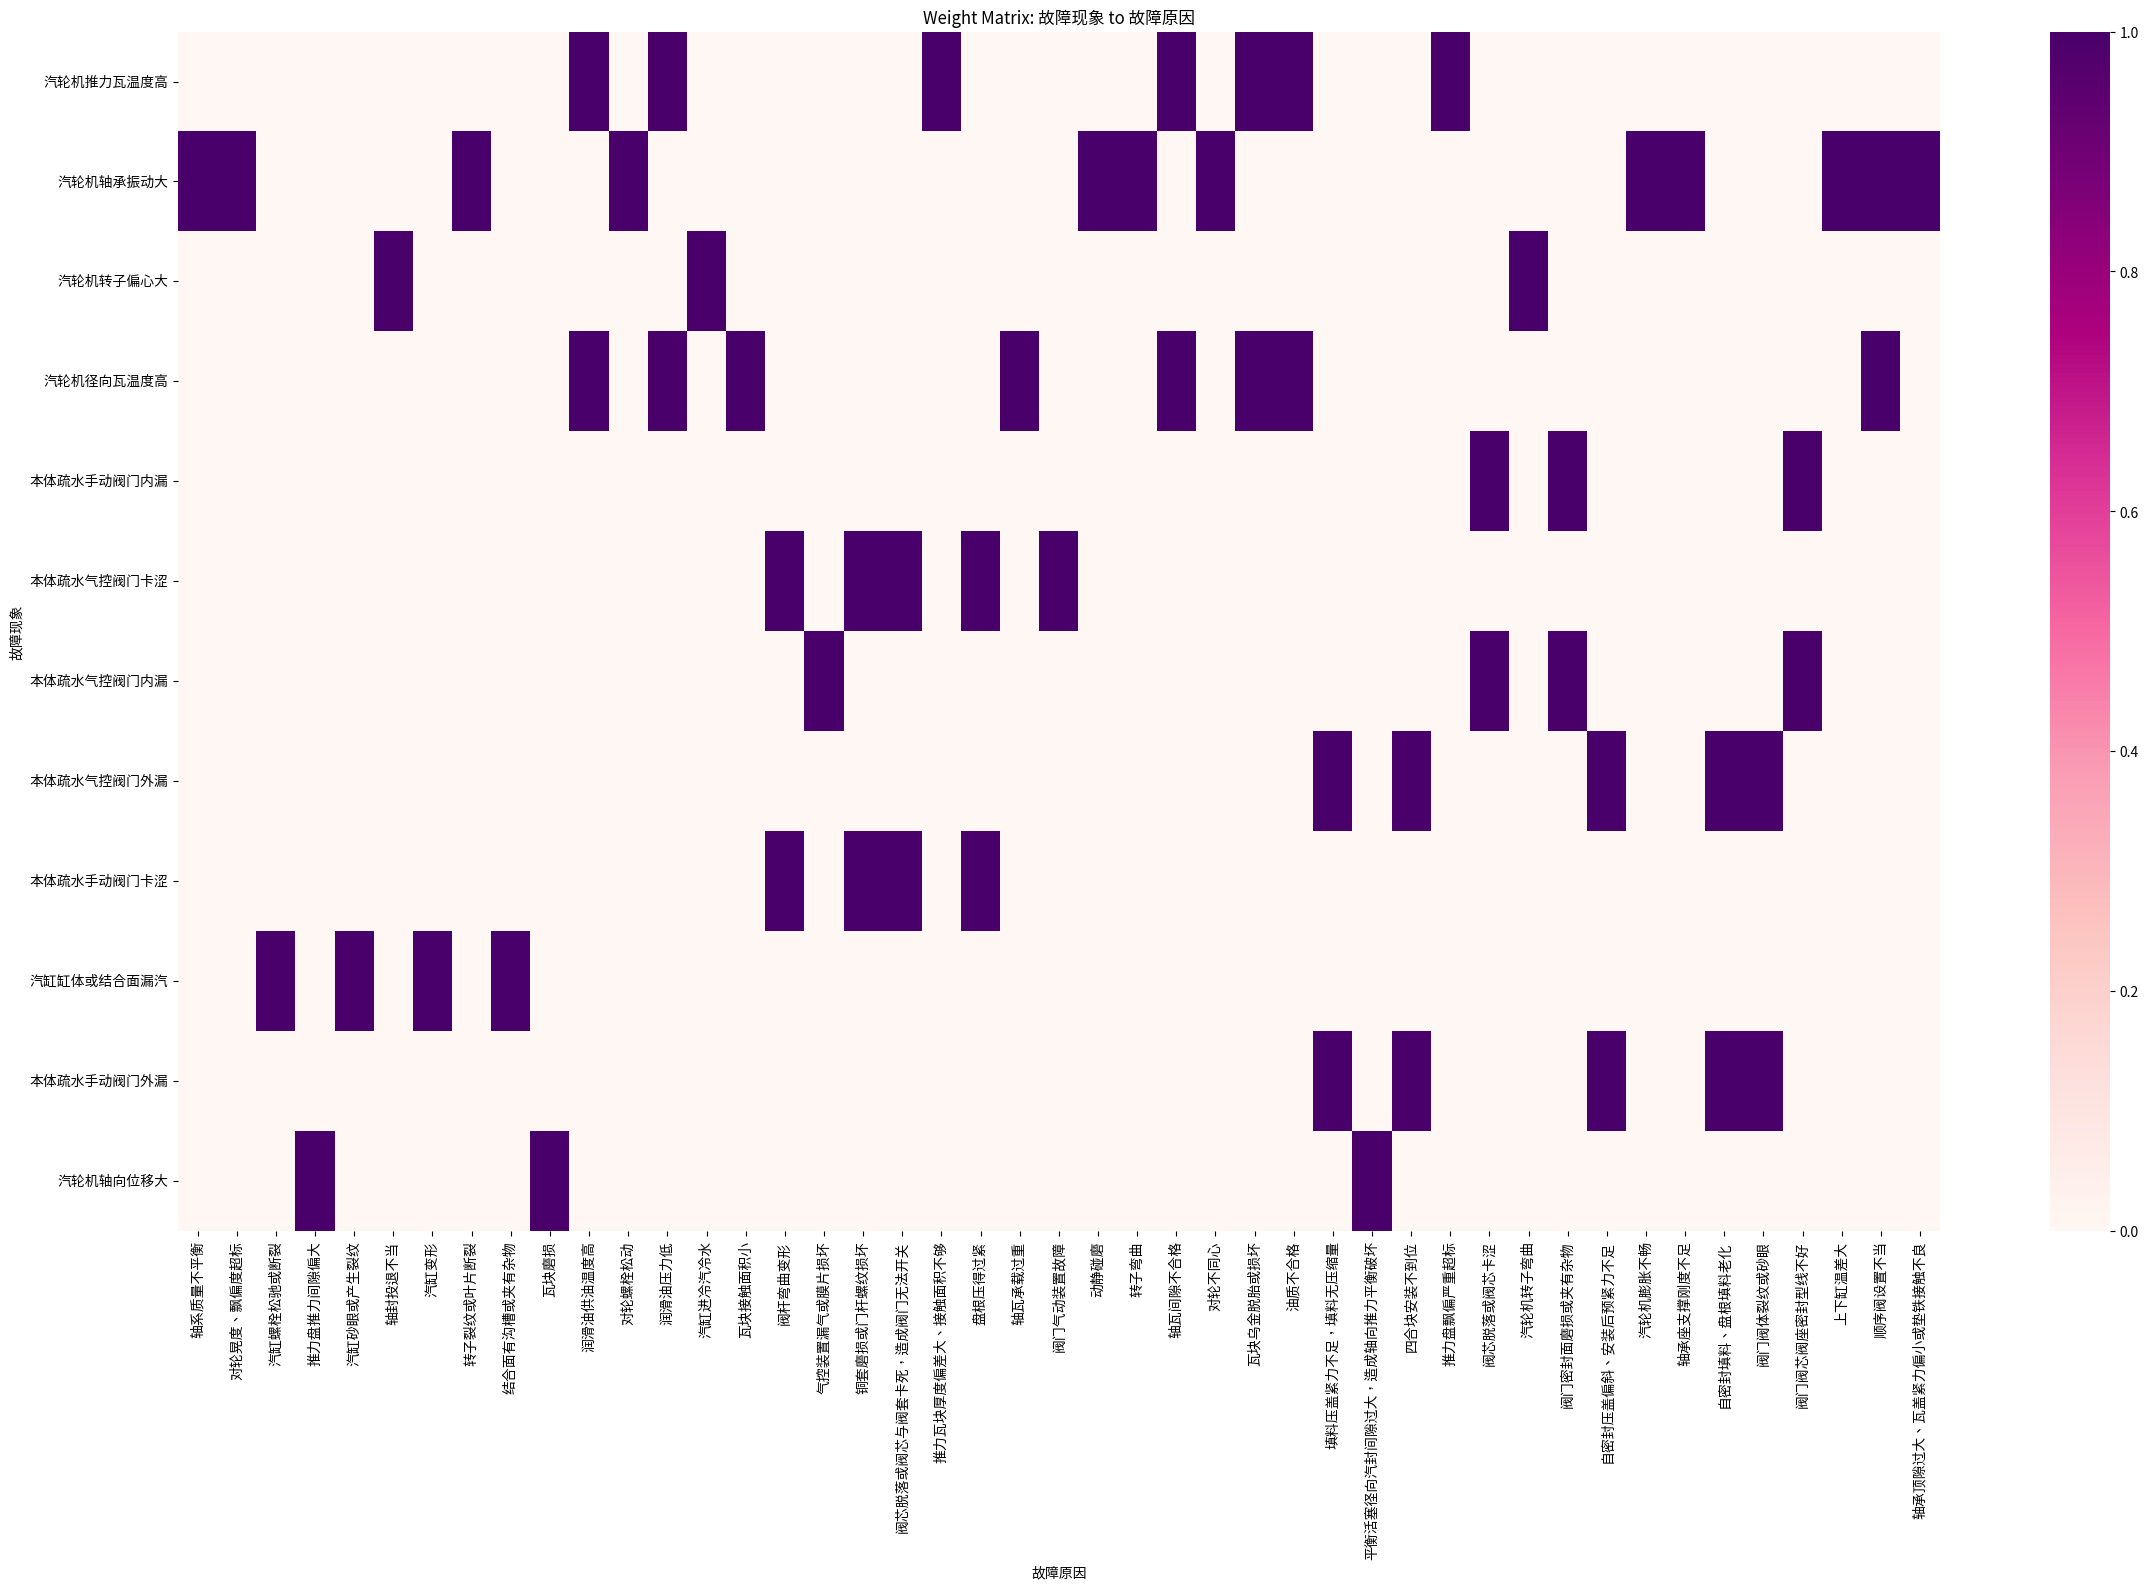

In [ ]:
# prompt: Based on the codes above, extract a weight matrix between name0 and name1, and plot a heatmap in matplotlib.

import numpy as np

# import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Extract nodes for name0 and name1
query_nodes_name0 = f"MATCH (n:{name0}) RETURN n.name AS name"
nodes_name0_result = graph.run(query_nodes_name0).data()
nodes_name0 = [item['name'] for item in nodes_name0_result]

query_nodes_name1 = f"MATCH (n:{name1}) RETURN n.name AS name"
nodes_name1_result = graph.run(query_nodes_name1).data()
nodes_name1 = [item['name'] for item in nodes_name1_result]

# Create a mapping from node name to index
name0_to_index = {name: i for i, name in enumerate(nodes_name0)}
name1_to_index = {name: i for i, name in enumerate(nodes_name1)}

# Initialize the weight matrix with zeros
weight_matrix = np.zeros((len(nodes_name0), len(nodes_name1)), dtype=int)

# Extract relationships and their weights
query_relationships = f"""
MATCH (a:{name0})-[r:{name0}_TO_{name1}]->(b:{name1})
RETURN a.name AS source, b.name AS target, r.weight AS weight
"""
relationships_result = graph.run(query_relationships).data()

# Populate the weight matrix
for rel in relationships_result:
    source_name = rel['source']
    target_name = rel['target']
    weight = rel['weight']
    if source_name in name0_to_index and target_name in name1_to_index:
        i = name0_to_index[source_name]
        j = name1_to_index[target_name]
        weight_matrix[i, j] = weight

print("Weight Matrix extracted:")
print(weight_matrix)

# Plot the heatmap
plt.figure(figsize=(24, 16))

sns.heatmap(weight_matrix, annot=False, fmt="d", cmap="RdPu",
            xticklabels=nodes_name1, yticklabels=nodes_name0)
plt.xlabel(name1)
plt.ylabel(name0)

plt.title(f"Weight Matrix: {name0} to {name1}")

plt.tight_layout()
plt.show()


#### 3.4. Pairing of `["故障原因", "原因归类"]`




##### 3.4.1. Nodes & Relationship Creation

In [ ]:
# 提取列名
# Original: ['专业', '系统', '设备', '总体'] for df.fund
# ["系统", "设备", "故障现象", "故障原因", "原因归类", "部件", "隐患等级", "监测技术"] for df_moni
# columns = ["系统", "设备", "", "", "", "", "", ""]
columns = ["故障原因", "原因归类"]

name0 = columns[0]
name1 = columns[1]

df = df_moni[columns]

# 去重处理，防止重复节点和关系
unique_nodes = {col: set(df[col].dropna().unique()) for col in columns}

print("-> Creating Nodes ...")

# 创建节点
node_dict = {col: {} for col in columns}  # 用于存储节点对象以便快速查询
for col in tqdm(columns):
    for value in unique_nodes[col]:
        node = Node(col, name=value)
        graph.create(node)
        node_dict[col][value] = node

print(f"-> Creating {name0}_TO_{name1} Relationships...")

# 创建关系
for _, row in tqdm(df.iterrows()):
    values = {col: row[col] for col in columns if not pd.isna(row[col])}

    # 创建 name0_TO_name1 关系
    if name0 in values and name1 in values:
        src_node = node_dict[name0][values[name0]]
        tgt_node = node_dict[name1][values[name1]]
        rel = Relationship.type(f"{name0}_TO_{name1}")
        graph.merge(rel(src_node, tgt_node))

print(f"-> {name0}_TO_{name1} Relationship Created!")

-> Creating Nodes ...


100%|██████████| 2/2 [00:24<00:00, 12.05s/it]


-> Creating 故障原因_TO_原因归类 Relationships...


63it [00:30,  2.04it/s]

-> 故障原因_TO_原因归类 Relationship Created!


##### 3.4.2. Weight Assigning
- 基于元素配对在数据集中的出现次数, 为节点间的关系分配权重

In [ ]:
# prompt: Based on the code above, assign a weight to each name0-name1 pair and add it as an attribute.

# Recalculate the relationships and add a weight attribute
print(f"-> Recalculating {name0}_TO_{name1} Relationships with Weights...")

# Count occurrences of each pair to determine weight
pair_counts = df.groupby(columns).size().reset_index(name='weight')

# Create or update relationships with weights
for _, row in tqdm(pair_counts.iterrows()):
    src_value = row[name0]
    tgt_value = row[name1]
    weight = int(row['weight'])  # Ensure weight is an integer

    src_node = node_dict[name0][src_value]
    tgt_node = node_dict[name1][tgt_value]
    rel_type = f"{name0}_TO_{name1}"

    # Create or merge the relationship with the weight property
    # Using MERGE will find the relationship if it exists and update its properties,
    # or create it if it doesn't exist.
    query = f"""
    MATCH (a:{name0} {{name: $src_name}}), (b:{name1} {{name: $tgt_name}})
    MERGE (a)-[r:{rel_type}]->(b)
    SET r.weight = $weight
    """
    graph.run(query, src_name=src_value, tgt_name=tgt_value, weight=weight)

print(f"-> {name0}_TO_{name1} Relationships Updated with Weights!")

-> Recalculating 故障原因_TO_原因归类 Relationships with Weights...


46it [00:07,  5.82it/s]

-> 故障原因_TO_原因归类 Relationships Updated with Weights!


Weight Matrix extracted:
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 2 0 0]
 [0 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 0]
 [2 0 0 0]
 [0 1 0 0]
 [2 0 0 0]
 [0 2 0 0]
 [0 1 0 0]
 [0 2 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 2 0 0]
 [0 1 0 0]
 [0 2 0 0]
 [0 2 0 0]
 [0 2 0 0]
 [0 1 0 0]
 [0 2 0 0]
 [0 1 0 0]
 [0 2 0 0]
 [0 1 0 0]
 [0 2 0 0]
 [0 2 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 2 0 0]
 [2 0 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0

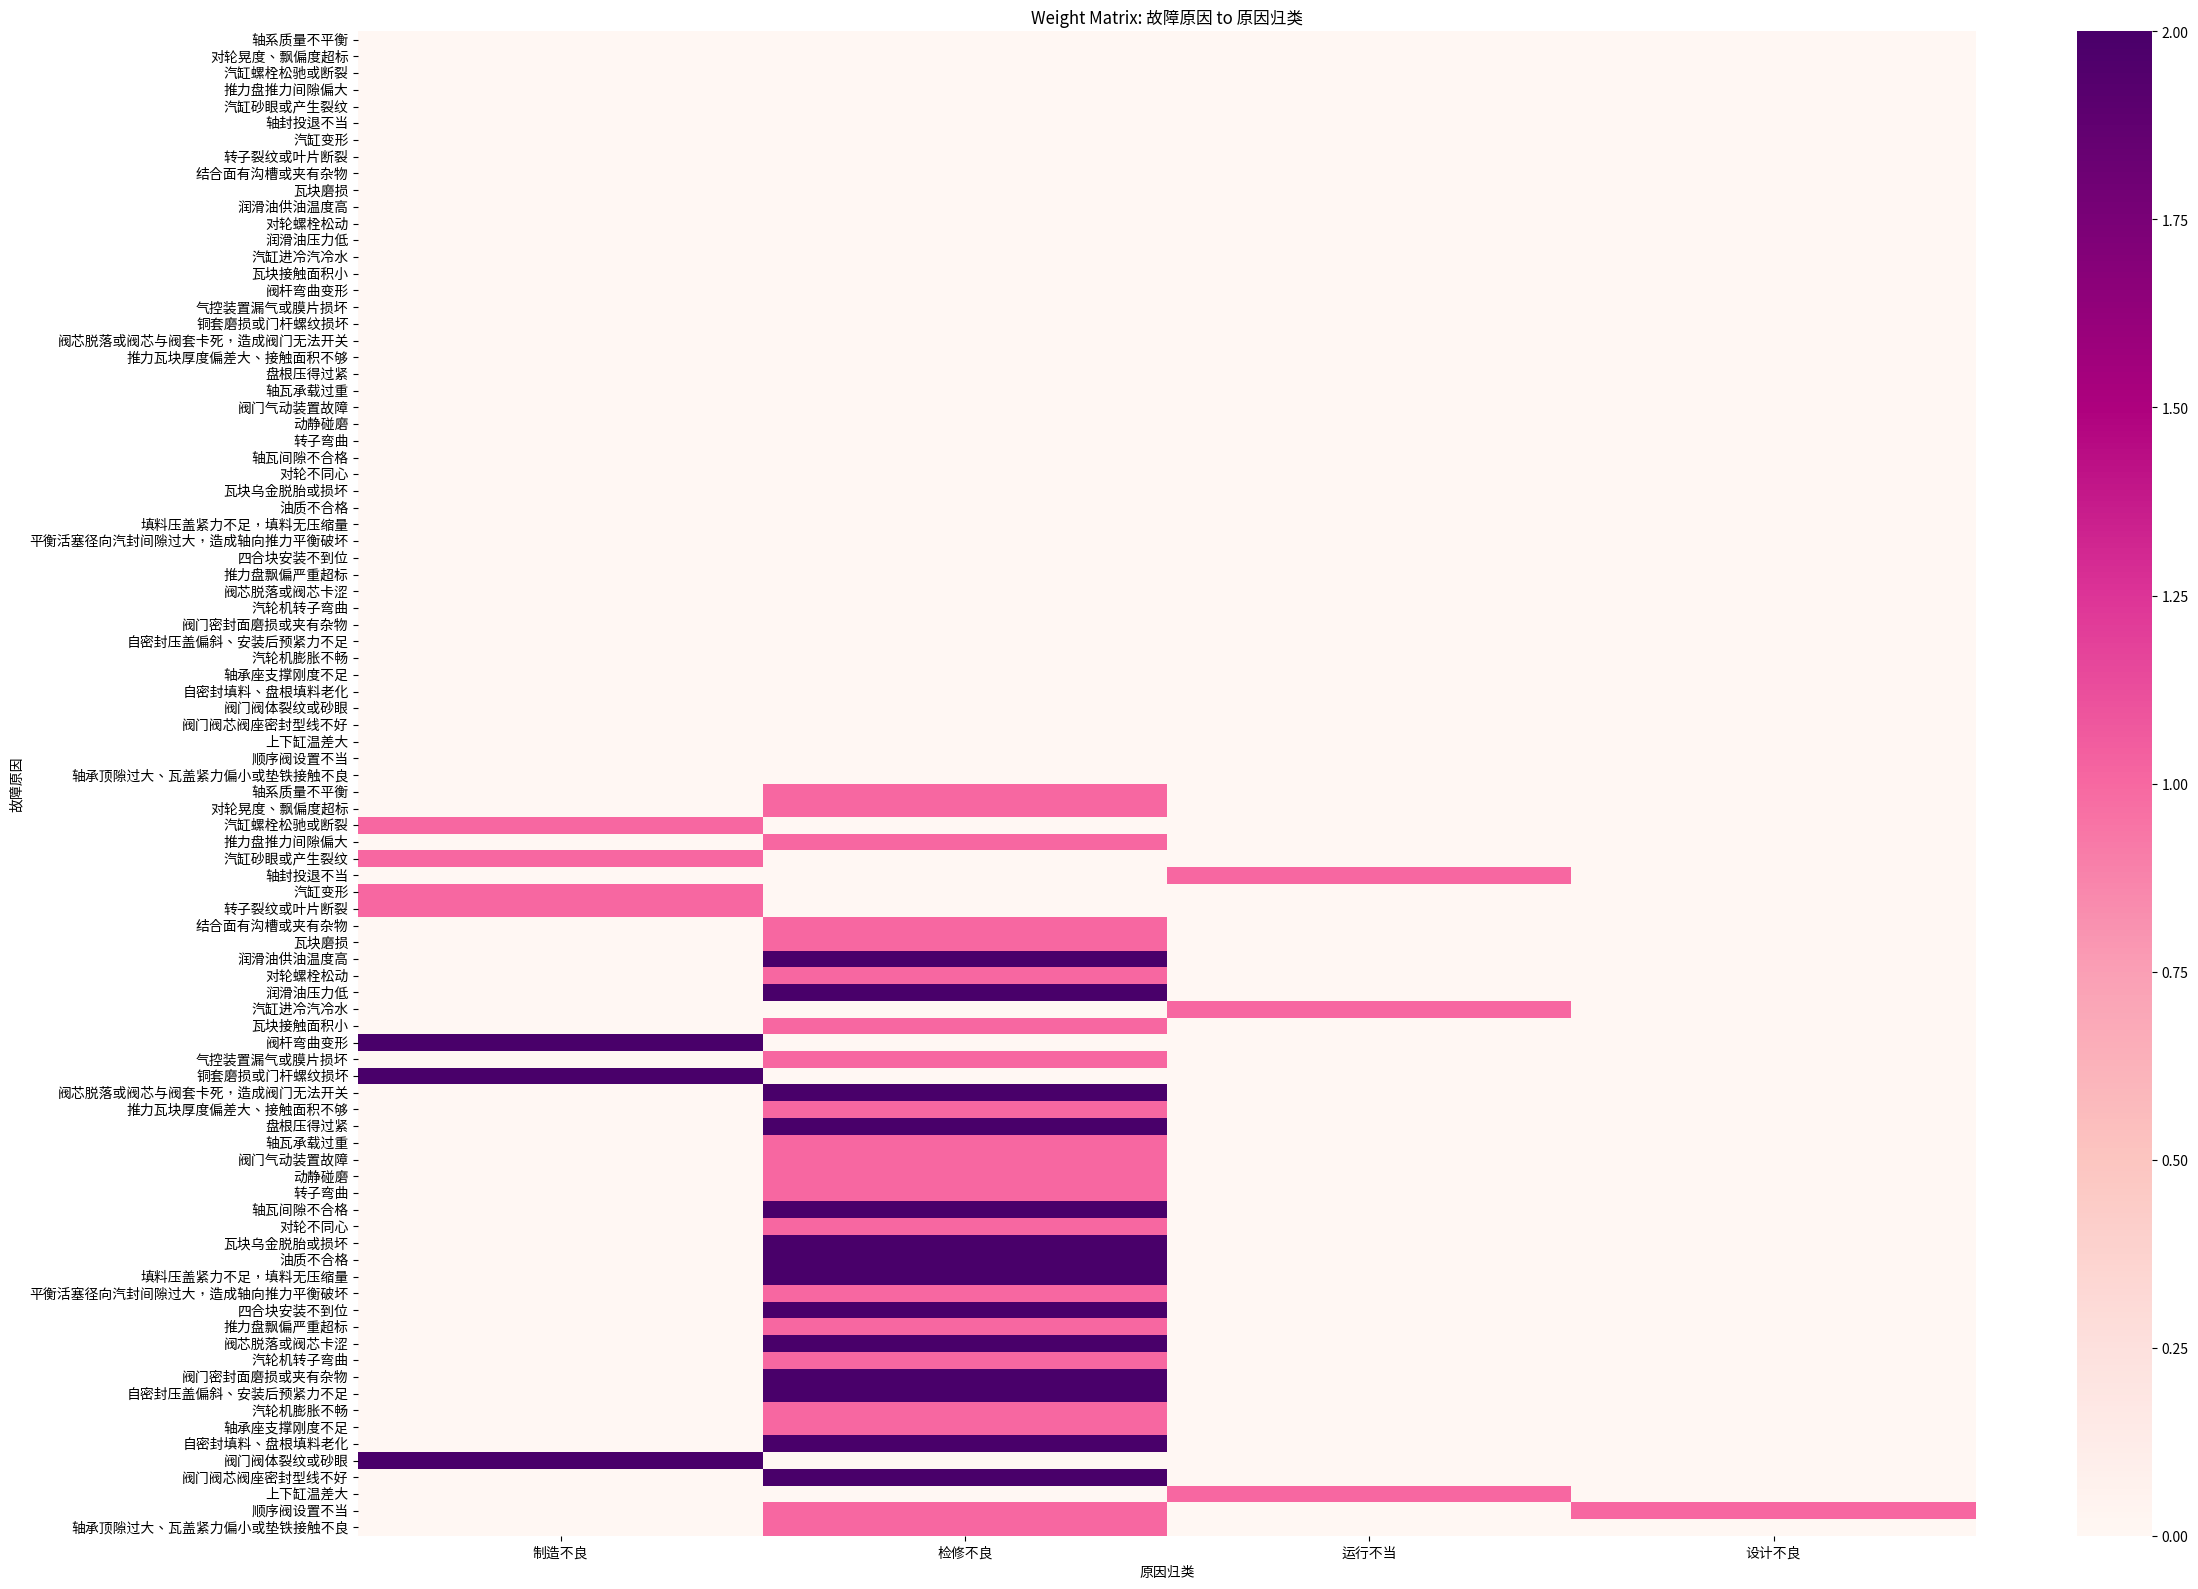

In [ ]:
# prompt: Based on the codes above, extract a weight matrix between name0 and name1, and plot a heatmap in matplotlib.

import numpy as np

# import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Extract nodes for name0 and name1
query_nodes_name0 = f"MATCH (n:{name0}) RETURN n.name AS name"
nodes_name0_result = graph.run(query_nodes_name0).data()
nodes_name0 = [item['name'] for item in nodes_name0_result]

query_nodes_name1 = f"MATCH (n:{name1}) RETURN n.name AS name"
nodes_name1_result = graph.run(query_nodes_name1).data()
nodes_name1 = [item['name'] for item in nodes_name1_result]

# Create a mapping from node name to index
name0_to_index = {name: i for i, name in enumerate(nodes_name0)}
name1_to_index = {name: i for i, name in enumerate(nodes_name1)}

# Initialize the weight matrix with zeros
weight_matrix = np.zeros((len(nodes_name0), len(nodes_name1)), dtype=int)

# Extract relationships and their weights
query_relationships = f"""
MATCH (a:{name0})-[r:{name0}_TO_{name1}]->(b:{name1})
RETURN a.name AS source, b.name AS target, r.weight AS weight
"""
relationships_result = graph.run(query_relationships).data()

# Populate the weight matrix
for rel in relationships_result:
    source_name = rel['source']
    target_name = rel['target']
    weight = rel['weight']
    if source_name in name0_to_index and target_name in name1_to_index:
        i = name0_to_index[source_name]
        j = name1_to_index[target_name]
        weight_matrix[i, j] = weight

print("Weight Matrix extracted:")
print(weight_matrix)

# Plot the heatmap
plt.figure(figsize=(24, 16))

sns.heatmap(weight_matrix, annot=False, fmt="d", cmap="RdPu",
            xticklabels=nodes_name1, yticklabels=nodes_name0)
plt.xlabel(name1)
plt.ylabel(name0)

plt.title(f"Weight Matrix: {name0} to {name1}")

plt.tight_layout()
plt.show()
